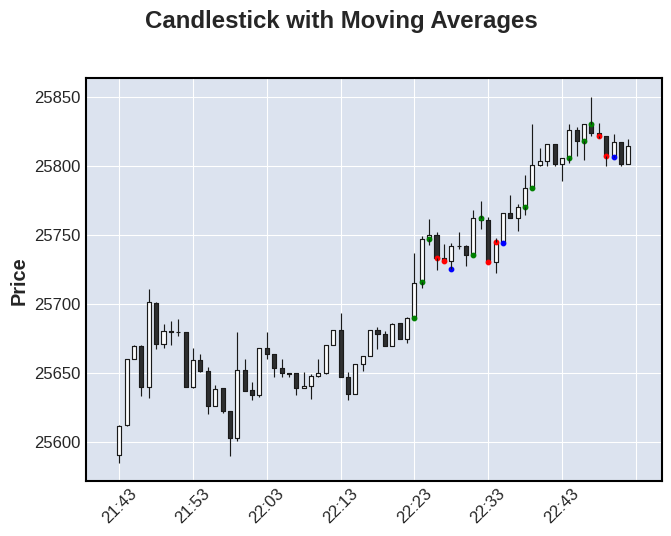

In [ ]:
import zenbt.zbt as zbt
from zenbt.data import get_sample_btc_data
import pandas as pd
import mplfinance as mpf
import talib

df = get_sample_btc_data()
df = df[120:250]

window = 30


ind = zbt.indicators.indicator_123(window, df['high'].to_numpy(), df['low'].to_numpy(), talib.MAX(df["high"], window).to_numpy(), talib.MIN(df['low'].to_numpy(), window))
df = df.to_pandas()
df['dates'] = pd.to_datetime(df['time'], unit='ms')
df.set_index('dates', inplace=True)

# tmin = talib.MIN(df['low'].to_numpy(), window)
# tmax = talib.MAX(df['high'].to_numpy(), window)



# # Apply the mask to determine where to display points
points_1 = df['open'].where(ind['point_1'])  # Keep 'Close' where mask is True, NaN otherwise
points_2 = df['close'].where(ind['point_2'])  # Keep 'Close' where mask is True, NaN otherwise
points_3 = df['low'].where(ind['point_3'])  # Keep 'Close' where mask is True, NaN otherwise
add_plot = [
    mpf.make_addplot(points_1, type='scatter', markersize=10, color='green'),
    mpf.make_addplot(points_2, type='scatter', markersize=10, color='red'),
    mpf.make_addplot(points_3, type='scatter', markersize=10, color='blue'),
    # mpf.make_addplot(tmax, type='scatter', markersize=10, color='blue'),
    # mpf.make_addplot(tmin, type='scatter', markersize=10, color='blue'),
    # mpf.make_addplot(ind['order_values'], type='scatter', markersize=10, color='lime'),
]

mpf.plot(df, type='candle', volume=False, title='Candlestick with Moving Averages', addplot=add_plot)